In [54]:
import cv2 as cv
import numpy as np
from pathlib import Path
from os import getenv
from fastai.vision.utils import get_image_files
import matplotlib.pyplot as plt

In [77]:
data_url=Path(getenv("HOME"))/".fastai/data/kaggle-chess/test"
data_url=Path(getenv("HOME"))/".fastai/data/chess_screenshots/test"
board_urls = get_image_files(data_url)

In [78]:
img = cv.imread(board_urls[100].as_posix())

In [79]:
img.dtype

dtype('uint8')

In [80]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [81]:
gray.dtype

dtype('uint8')

In [82]:
gray.nbytes

786432

In [83]:
gray = np.float32(gray)

In [84]:
gray.dtype

dtype('float32')

In [85]:
gray.nbytes

3145728

In [86]:
dst = cv.cornerHarris(gray, 2, 3, 0.04)
#result is dilated for marking the corners, not important

In [100]:
cv.cornerHarris??

In [87]:
dst = cv.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.

In [88]:
img[dst>0.01 * dst.max()] = [0, 0, 255]

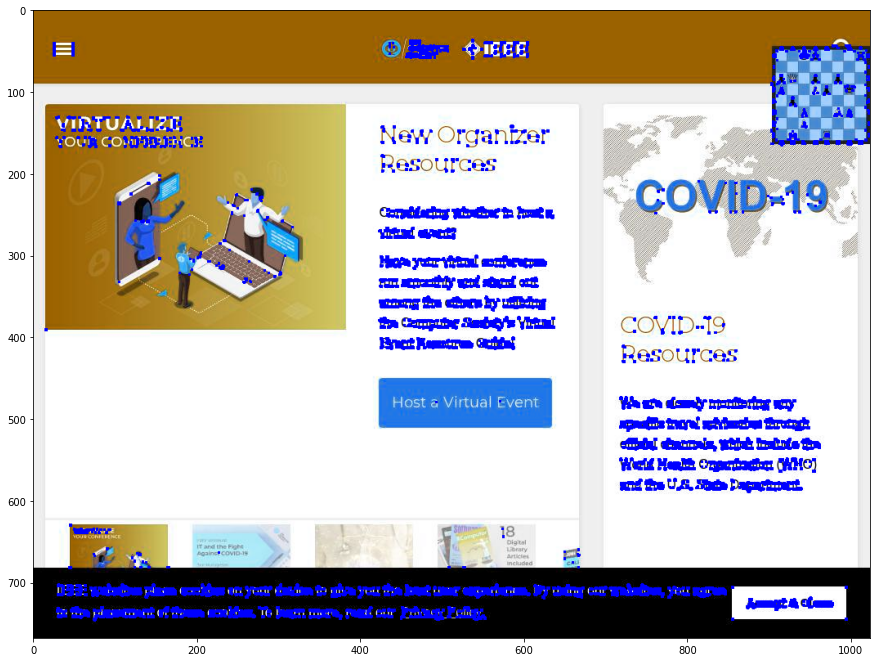

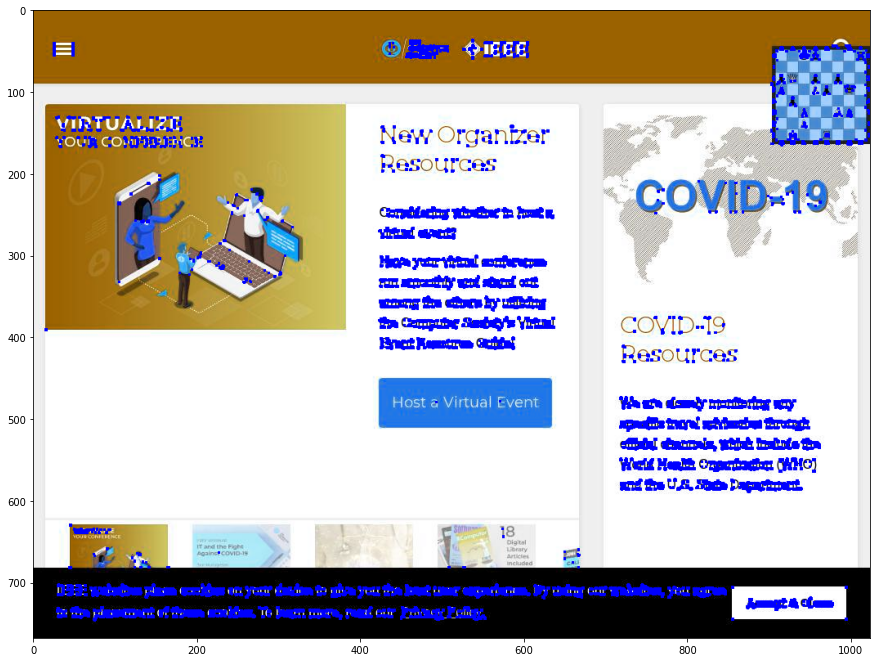

In [99]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ax.imshow(img)
fig